In [ ]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np

# 폴더 경로
base_dir = "/content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2"
stages = ['train_data', 'validation_data', 'test_data']
folders = ['Lt_Normal', 'Lt_OA', 'Rt_Normal', 'Rt_OA']
label_mapping = {
    'Lt_Normal': 0,
    'Lt_OA': 1,
    'Rt_Normal': 0,
    'Rt_OA': 1
}

# 데이터를 저장할 딕셔너리
data = {}

for stage in stages:
    print(f"Processing {stage}...")
    data[stage] = {'image': [], 'patient_id': [], 'side': [], 'label': []}

    stage_path = os.path.join(base_dir, stage)
    for folder in folders:
        folder_path = os.path.join(stage_path, folder)
        label = label_mapping[folder]  # 폴더 이름으로 Label 결정

        for image_file in tqdm(os.listdir(folder_path)):
            if not image_file.lower().endswith('.jpg'):
                continue  # 이미지 파일이 아니면 스킵

            try:
                # 파일 이름에서 Patient ID 추출
                name, ext = os.path.splitext(image_file) # CBCT Code
                parts = name.split(' ')
                patient_id = parts[0]

                #patient_id, side = image_file.split('') # MRI CODE
                side = 'Lt' if 'Lt' in folder else 'Rt'  # 폴더 이름에서 좌우 구분
                image_path = os.path.join(folder_path, image_file)

                # 이미지 읽고 리사이즈
                image = cv2.imread(image_path)
                resized_image = cv2.resize(image, (140, 140))  # 리사이즈 크기 설정
                data[stage]['image'].append(resized_image)
                data[stage]['patient_id'].append(patient_id)
                data[stage]['side'].append(side)
                data[stage]['label'].append(label)

            except Exception as e:
                print(f"Error processing file: {image_file}, Error: {e}")

    # numpy 배열로 변환
    data[stage]['image'] = np.array(data[stage]['image'])
    data[stage]['label'] = np.array(data[stage]['label'])

# 데이터 저장
pkl_file_path = os.path.join(base_dir, "/content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2/tmj_oa_CBCT1,3 + NEW_dataset.pkl")
with open(pkl_file_path, 'wb') as f:
    pickle.dump(data, f)

print(f"Data successfully saved to {pkl_file_path}")

Processing train_data...


100%|██████████| 316/316 [00:08<00:00, 36.86it/s] 


Processing validation_data...


100%|██████████| 102/102 [00:04<00:00, 22.68it/s]


Processing test_data...


100%|██████████| 111/111 [00:03<00:00, 28.04it/s]


Data successfully saved to /content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2/tmj_oa_CBCT1,3 + NEW_dataset.pkl


In [ ]:
with open(pkl_file_path, 'rb') as f:
    loaded_data = pickle.load(f)

for stage in stages:
    print(f"Stage: {stage}")
    print(f"Number of Images: {len(loaded_data[stage]['image'])}")
    print(f"Patient IDs: {loaded_data[stage]['patient_id'][:5]}")
    print(f"Sides: {loaded_data[stage]['side'][:5]}")
    print(f"Labels: {loaded_data[stage]['label'][:5]}")
    print("-" * 30)


Stage: train_data
Number of Images: 1645
Patient IDs: ['11053022', '14957701', '11858325', '11981447', '14966086']
Sides: ['Lt', 'Lt', 'Lt', 'Lt', 'Lt']
Labels: [0 0 0 0 0]
------------------------------
Stage: validation_data
Number of Images: 550
Patient IDs: ['11177143', '11660540', '14988707', '14951489', '10664250']
Sides: ['Lt', 'Lt', 'Lt', 'Lt', 'Lt']
Labels: [0 0 0 0 0]
------------------------------
Stage: test_data
Number of Images: 550
Patient IDs: ['14003185', '12725494', '14976260', '11880794', '15024738']
Sides: ['Lt', 'Lt', 'Lt', 'Lt', 'Lt']
Labels: [0 0 0 0 0]
------------------------------


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Class weights: {0: 0.8923303834808259, 1: 1.137218045112782}
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 854ms/step - accuracy: 0.5164 - auc: 0.5169 - loss: 0.8105 - val_accuracy: 0.4395 - val_auc: 0.4748 - val_loss: 1.3257 - learning_rate: 1.0000e-04
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.5163 - auc: 0.5294 - loss: 0.7308 - val_accuracy: 0.4395 - val_auc: 0.5293 - val_loss: 1.1952 - learning_rate: 1.0000e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5184 - auc: 0.5280 - loss: 0.7446 - val_accuracy: 0.5605 - val_auc: 0.5672 - val_loss: 1.7246 - learning_rate: 1.0000e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - accuracy: 0.5816 - auc: 0.5942 - loss: 0.6962 - val_accuracy: 0.4395 - val_auc: 0.6232 - val_loss: 2.2025 - learning_rate: 1.0000e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.5696 - auc: 0.6064 - loss: 0.6970 - val_accuracy: 0.4395 - val_auc: 0.6230 - val_loss: 1.6825 - learning_rate: 1.0000e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.

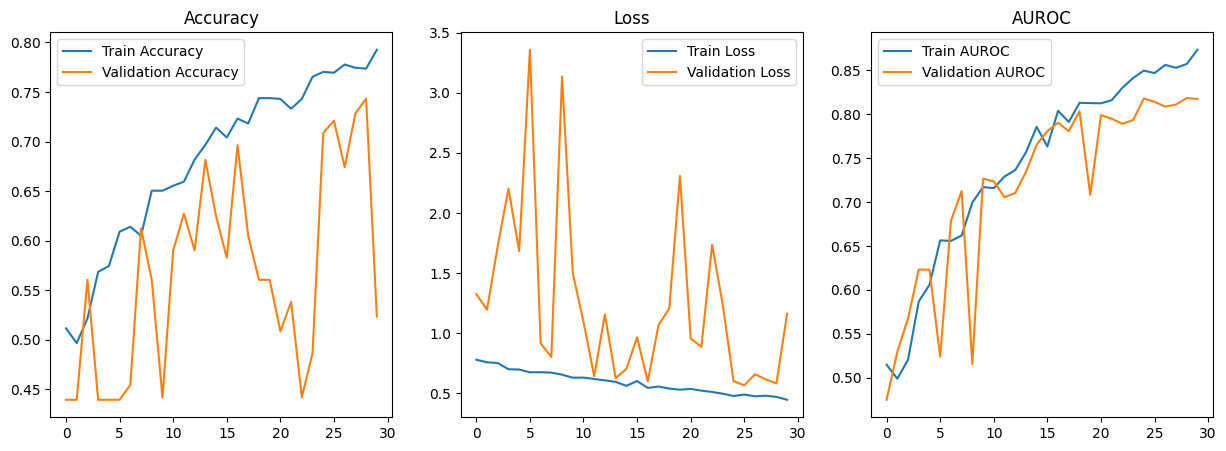

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7383 - auc: 0.5822 - loss: 0.6032
Test Loss: 0.6919, Test Accuracy: 0.7012, Test AUROC: 0.7604
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
Optimal Threshold: 0.2464


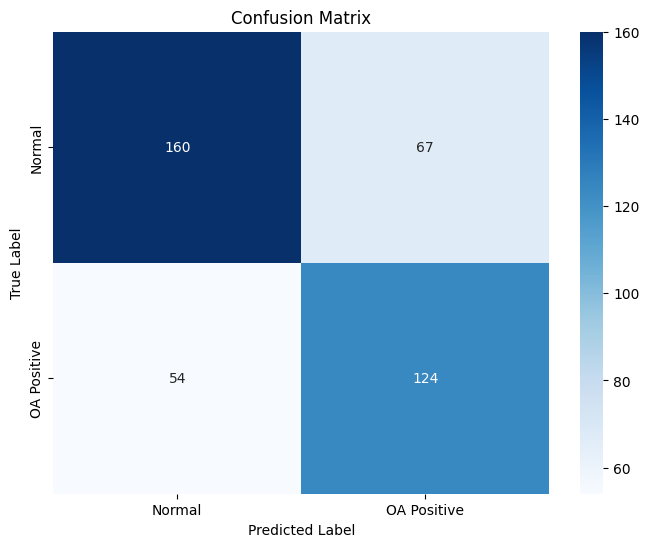

Confusion Matrix:
 [[160  67]
 [ 54 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       227
           1       0.65      0.70      0.67       178

    accuracy                           0.70       405
   macro avg       0.70      0.70      0.70       405
weighted avg       0.70      0.70      0.70       405



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/학습_data_1,3(crop)/tmj_oa_CBCT1,3_dataset_3.pkl', 'rb') as f:
    dataset = pickle.load(f)

# 데이터셋 분리
train_images = dataset['train_data']['image']
train_labels = dataset['train_data']['label']
val_images = dataset['validation_data']['image']
val_labels = dataset['validation_data']['label']
test_images = dataset['test_data']['image']
test_labels = dataset['test_data']['label']

# 데이터 증강 생성기 설정
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# 데이터 증강 생성기를 통해 데이터 생성
train_generator = train_datagen.flow(
    train_images, train_labels, batch_size=32, shuffle=True
)

val_generator = val_datagen.flow(
    val_images, val_labels, batch_size=32, shuffle=False
)

test_generator = test_datagen.flow(
    test_images, test_labels, batch_size=32, shuffle=False
)

# VGG16 모델 구성
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(140, 140, 3))
for layer in base_model.layers[:-12]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# 클래스 가중치 계산
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
#class_weights = {0: 1.0, 1: 1.5}  # 클래스 1에 더 높은 가중치 부여
print("Class weights:", class_weights)


# 콜백 설정
early_stopping = EarlyStopping(monitor='val_auc', patience=7, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_vgg16_auroc.keras', save_best_only=True, monitor='val_auc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=3, mode='max', min_lr=1e-6)

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# 학습 결과 시각화
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUROC')
plt.plot(history.history['val_auc'], label='Validation AUROC')
plt.legend()
plt.title('AUROC')
plt.show()

# 테스트 데이터 평가
test_loss, test_accuracy, test_auc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test AUROC: {test_auc:.4f}")

# ROC Curve
y_pred = model.predict(test_generator).flatten()
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Confusion Matrix
y_pred_adjusted = (y_pred >= optimal_threshold).astype(int)
#y_pred_adjusted = (y_pred >= 0.4).astype(int)  # 임계값을 약간 높임
conf_matrix = confusion_matrix(test_labels, y_pred_adjusted)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "OA Positive"], yticklabels=["Normal", "OA Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(test_labels, y_pred_adjusted))

model.save('/content/drive/MyDrive/TMJ OA/학습_data_1,3(crop)/CBCT1,3_model.keras')


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
AUC: 0.7608
95% CI: 0.7146 - 0.8087


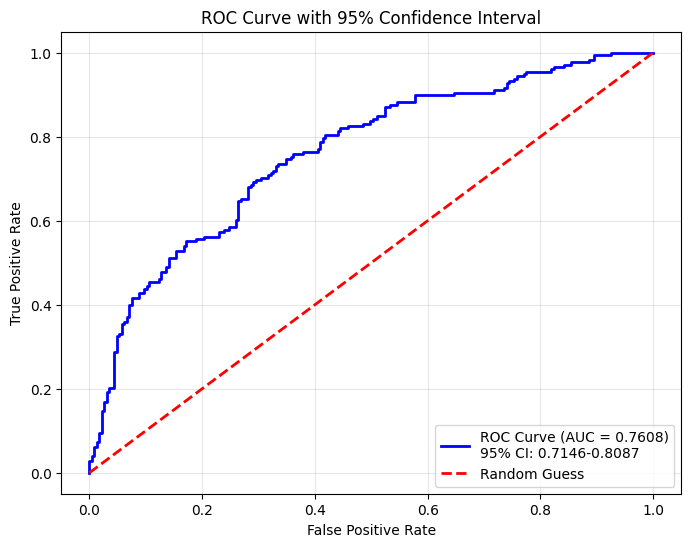

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 테스트 레이블 및 예측값
y_true = test_labels  # 실제 레이블
y_pred = model.predict(test_images / 255.0).flatten()  # 예측 확률값 (스케일링된 이미지 사용)

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# AUC 95% CI 계산 (부트스트랩)
n_bootstraps = 1000  # 부트스트랩 샘플 수
rng = np.random.RandomState(42)  # 재현성 확보
bootstrapped_aucs = []

for i in range(n_bootstraps):
    # 부트스트랩 샘플링
    indices = rng.choice(len(y_true), len(y_true), replace=True)
    y_true_bootstrap = y_true[indices]
    y_pred_bootstrap = y_pred[indices]

    try:
        auc_bootstrap = roc_auc_score(y_true_bootstrap, y_pred_bootstrap)
        bootstrapped_aucs.append(auc_bootstrap)
    except ValueError:  # 예외 처리 (불가능한 경우 스킵)
        continue

# 신뢰 구간 계산
lower = np.percentile(bootstrapped_aucs, 2.5)
upper = np.percentile(bootstrapped_aucs, 97.5)

print(f"AUC: {roc_auc:.4f}")
print(f"95% CI: {lower:.4f} - {upper:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})\n95% CI: {lower:.4f}-{upper:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

# 그래프 스타일 설정
plt.title('ROC Curve with 95% Confidence Interval')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()




In [ ]:
import pandas as pd
import numpy as np
import pickle

# 경로 설정
pkl_file_path = '/content/drive/MyDrive/TMJ OA/학습_data1,3(Crop)/tmj_oa_CBCT1,3_dataset_2.pkl'
metadata_path = '/content/drive/MyDrive/TMJ OA/241023_TMJ OA data.csv'

# 메타데이터 불러오기
metadata = pd.read_csv(metadata_path)
metadata['Patient ID'] = metadata['Patient ID'].astype(str)  # Patient ID를 문자열로 변환
metadata = metadata.set_index('Patient ID')  # Patient ID를 인덱스로 설정

# PKL 파일 불러오기
with open(pkl_file_path, 'rb') as f:
    dataset = pickle.load(f)

# PKL 파일과 메타데이터 병합
for stage in ['train_data', 'validation_data', 'test_data']:
    patient_ids = dataset[stage]['patient_id']
    ages = []
    sexes = []

    for pid in patient_ids:
        if pid in metadata.index:
            try:
                age = metadata.loc[pid, 'AGE']
                sex = metadata.loc[pid, 'SEX']

                # 데이터가 비정상적이면 None으로 처리
                if not isinstance(age, (int, float)) or pd.isna(age):
                    age = 0.0  # 기본값으로 0.0 설정
                if not isinstance(sex, str) or pd.isna(sex):
                    sex = 'Unknown'  # 기본값으로 'Unknown' 설정

                ages.append(age)
                sexes.append(age)
            except Exception as e:
                print(f"Error with Patient ID {pid}: {e}")
                ages.append(0.0)  # 기본값
                sexes.append('Unknown')  # 기본값
        else:
            ages.append(0.0)  # 기본값
            sexes.append('Unknown')  # 기본값

    # 병합된 AGE와 SEX를 NumPy 배열로 저장
    dataset[stage]['age'] = np.array(ages, dtype='float32')  # 숫자 형태로 저장
    dataset[stage]['sex'] = np.array(sexes)                 # 문자열 형태로 저장

# 병합 결과 확인
print("Train data with metadata:", len(dataset['train_data']['age']), len(dataset['train_data']['sex']))
print("Validation data with metadata:", len(dataset['validation_data']['age']), len(dataset['validation_data']['sex']))
print("Test data with metadata:", len(dataset['test_data']['age']), len(dataset['test_data']['sex']))

# 수정된 데이터 저장
output_pkl_path = '/content/drive/MyDrive/TMJ OA/학습_data1,3(Crop)/tmj_oa_CBCT1,3_dataset_meta.pkl'
with open(output_pkl_path, 'wb') as f:
    pickle.dump(dataset, f)

print(f"Data successfully saved to {pkl_file_path}")


Train data with metadata: 1210 1210
Validation data with metadata: 405 405
Test data with metadata: 405 405
Data successfully saved to /content/drive/MyDrive/TMJ OA/학습_data1,3(Crop)/tmj_oa_CBCT1,3_dataset_2.pkl
